## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  37.757721   832.383941  0.514885  10.179204  1.470948
1  66.767888  1276.007718  0.306762   1.432570  1.481018
2  99.206614   134.589382  0.558820   9.675875  0.583329
3  58.060068   573.896012  0.092391   4.434116  0.641990
4   8.245824   209.138155  0.311991   4.597395  1.499891


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.10189 | train_mse: 4.2071  | train_mae: 1.48037 |  0:00:00s
epoch 1  | loss: 1.09337 | train_mse: 3.36665 | train_mae: 1.35594 |  0:00:00s


epoch 2  | loss: 1.00339 | train_mse: 2.75868 | train_mae: 1.23346 |  0:00:00s
epoch 3  | loss: 0.90545 | train_mse: 2.23714 | train_mae: 1.11386 |  0:00:00s


epoch 4  | loss: 0.95314 | train_mse: 1.95533 | train_mae: 1.03954 |  0:00:01s


epoch 5  | loss: 1.01711 | train_mse: 2.12715 | train_mae: 1.06954 |  0:00:01s


epoch 6  | loss: 0.85543 | train_mse: 1.87415 | train_mae: 1.00979 |  0:00:02s


epoch 7  | loss: 0.9262  | train_mse: 1.60832 | train_mae: 0.9381  |  0:00:02s


epoch 8  | loss: 0.86839 | train_mse: 1.50025 | train_mae: 0.90697 |  0:00:03s


epoch 9  | loss: 0.91181 | train_mse: 1.40079 | train_mae: 0.86598 |  0:00:03s
epoch 10 | loss: 0.85743 | train_mse: 1.28938 | train_mae: 0.82397 |  0:00:03s


epoch 11 | loss: 0.87458 | train_mse: 1.19314 | train_mae: 0.80165 |  0:00:03s


epoch 12 | loss: 0.71904 | train_mse: 1.11864 | train_mae: 0.77917 |  0:00:03s


epoch 13 | loss: 0.69856 | train_mse: 1.07416 | train_mae: 0.76239 |  0:00:04s


epoch 14 | loss: 0.74009 | train_mse: 0.99803 | train_mae: 0.73044 |  0:00:04s


epoch 15 | loss: 0.68242 | train_mse: 0.92355 | train_mae: 0.69111 |  0:00:05s


epoch 16 | loss: 0.69501 | train_mse: 0.88107 | train_mae: 0.67192 |  0:00:05s


epoch 17 | loss: 0.68156 | train_mse: 0.87029 | train_mae: 0.66888 |  0:00:05s


epoch 18 | loss: 0.59621 | train_mse: 0.83768 | train_mae: 0.65476 |  0:00:06s
epoch 19 | loss: 0.58482 | train_mse: 0.80496 | train_mae: 0.65124 |  0:00:06s


epoch 20 | loss: 0.8003  | train_mse: 0.72033 | train_mae: 0.62807 |  0:00:06s
epoch 21 | loss: 0.63764 | train_mse: 0.68886 | train_mae: 0.61058 |  0:00:06s


epoch 22 | loss: 0.57927 | train_mse: 0.66444 | train_mae: 0.59621 |  0:00:06s
epoch 23 | loss: 0.61093 | train_mse: 0.64192 | train_mae: 0.58164 |  0:00:07s


epoch 24 | loss: 0.54252 | train_mse: 0.6207  | train_mae: 0.57067 |  0:00:07s
epoch 25 | loss: 0.55326 | train_mse: 0.61394 | train_mae: 0.56629 |  0:00:07s


epoch 26 | loss: 0.53782 | train_mse: 0.6016  | train_mae: 0.56487 |  0:00:07s


epoch 27 | loss: 0.54946 | train_mse: 0.59555 | train_mae: 0.56245 |  0:00:07s
epoch 28 | loss: 0.61581 | train_mse: 0.58647 | train_mae: 0.55944 |  0:00:07s


epoch 29 | loss: 0.55373 | train_mse: 0.56568 | train_mae: 0.55128 |  0:00:07s
epoch 30 | loss: 0.62084 | train_mse: 0.54686 | train_mae: 0.54398 |  0:00:08s


epoch 31 | loss: 0.59617 | train_mse: 0.5301  | train_mae: 0.53376 |  0:00:08s
epoch 32 | loss: 0.49632 | train_mse: 0.51159 | train_mae: 0.52954 |  0:00:08s


epoch 33 | loss: 0.46972 | train_mse: 0.50885 | train_mae: 0.52873 |  0:00:08s


epoch 34 | loss: 0.40424 | train_mse: 0.51083 | train_mae: 0.52421 |  0:00:08s


epoch 35 | loss: 0.54081 | train_mse: 0.49488 | train_mae: 0.51277 |  0:00:08s
epoch 36 | loss: 0.6958  | train_mse: 0.47577 | train_mae: 0.49894 |  0:00:09s


epoch 37 | loss: 0.64257 | train_mse: 0.46304 | train_mae: 0.49125 |  0:00:09s


epoch 38 | loss: 0.50595 | train_mse: 0.44797 | train_mae: 0.48182 |  0:00:09s
epoch 39 | loss: 0.4846  | train_mse: 0.44048 | train_mae: 0.47197 |  0:00:09s


epoch 40 | loss: 0.59216 | train_mse: 0.44096 | train_mae: 0.47135 |  0:00:09s


epoch 41 | loss: 0.52171 | train_mse: 0.42112 | train_mae: 0.46109 |  0:00:10s
epoch 42 | loss: 0.42544 | train_mse: 0.39799 | train_mae: 0.44786 |  0:00:10s


epoch 43 | loss: 0.50151 | train_mse: 0.38664 | train_mae: 0.44142 |  0:00:10s
epoch 44 | loss: 0.50593 | train_mse: 0.36677 | train_mae: 0.42883 |  0:00:10s


epoch 45 | loss: 0.36688 | train_mse: 0.35407 | train_mae: 0.42018 |  0:00:10s


epoch 46 | loss: 0.3686  | train_mse: 0.34773 | train_mae: 0.41616 |  0:00:11s


epoch 47 | loss: 0.47018 | train_mse: 0.34629 | train_mae: 0.41584 |  0:00:11s
epoch 48 | loss: 0.29016 | train_mse: 0.3381  | train_mae: 0.41235 |  0:00:11s


epoch 49 | loss: 0.42574 | train_mse: 0.32554 | train_mae: 0.40619 |  0:00:11s
epoch 50 | loss: 0.48113 | train_mse: 0.31433 | train_mae: 0.39876 |  0:00:11s


epoch 51 | loss: 0.45065 | train_mse: 0.30639 | train_mae: 0.39455 |  0:00:12s
epoch 52 | loss: 0.50212 | train_mse: 0.29596 | train_mae: 0.39231 |  0:00:12s


epoch 53 | loss: 0.45366 | train_mse: 0.28793 | train_mae: 0.39392 |  0:00:12s
epoch 54 | loss: 0.28005 | train_mse: 0.27268 | train_mae: 0.3916  |  0:00:12s
epoch 55 | loss: 0.41087 | train_mse: 0.25906 | train_mae: 0.3826  |  0:00:12s


epoch 56 | loss: 0.49161 | train_mse: 0.24695 | train_mae: 0.37435 |  0:00:12s


epoch 57 | loss: 0.45281 | train_mse: 0.2445  | train_mae: 0.37257 |  0:00:12s
epoch 58 | loss: 0.30053 | train_mse: 0.2518  | train_mae: 0.37064 |  0:00:13s


epoch 59 | loss: 0.41018 | train_mse: 0.25345 | train_mae: 0.36844 |  0:00:13s
epoch 60 | loss: 0.35965 | train_mse: 0.25177 | train_mae: 0.3649  |  0:00:13s


epoch 61 | loss: 0.33969 | train_mse: 0.24545 | train_mae: 0.35991 |  0:00:13s
epoch 62 | loss: 0.38176 | train_mse: 0.24154 | train_mae: 0.35945 |  0:00:13s


epoch 63 | loss: 0.2471  | train_mse: 0.23591 | train_mae: 0.35452 |  0:00:13s
epoch 64 | loss: 0.49298 | train_mse: 0.2353  | train_mae: 0.34978 |  0:00:13s


epoch 65 | loss: 0.36774 | train_mse: 0.23014 | train_mae: 0.35014 |  0:00:14s
epoch 66 | loss: 0.36567 | train_mse: 0.23265 | train_mae: 0.34834 |  0:00:14s


epoch 67 | loss: 0.25849 | train_mse: 0.23937 | train_mae: 0.35117 |  0:00:14s
epoch 68 | loss: 0.24552 | train_mse: 0.24922 | train_mae: 0.34959 |  0:00:14s


epoch 69 | loss: 0.37226 | train_mse: 0.25031 | train_mae: 0.34959 |  0:00:14s
epoch 70 | loss: 0.33048 | train_mse: 0.25266 | train_mae: 0.35215 |  0:00:14s


epoch 71 | loss: 0.3234  | train_mse: 0.24466 | train_mae: 0.34619 |  0:00:14s
epoch 72 | loss: 0.24795 | train_mse: 0.22767 | train_mae: 0.33972 |  0:00:14s


epoch 73 | loss: 0.18345 | train_mse: 0.20002 | train_mae: 0.32907 |  0:00:15s
epoch 74 | loss: 0.25804 | train_mse: 0.18569 | train_mae: 0.32076 |  0:00:15s


epoch 75 | loss: 0.44163 | train_mse: 0.17765 | train_mae: 0.31363 |  0:00:15s


epoch 76 | loss: 0.37335 | train_mse: 0.16978 | train_mae: 0.3049  |  0:00:15s
epoch 77 | loss: 0.26624 | train_mse: 0.17073 | train_mae: 0.30627 |  0:00:15s


epoch 78 | loss: 0.33894 | train_mse: 0.177   | train_mae: 0.30717 |  0:00:15s


epoch 79 | loss: 0.27434 | train_mse: 0.1767  | train_mae: 0.30636 |  0:00:16s
epoch 80 | loss: 0.31749 | train_mse: 0.16718 | train_mae: 0.30067 |  0:00:16s


epoch 81 | loss: 0.46311 | train_mse: 0.16642 | train_mae: 0.29907 |  0:00:16s
epoch 82 | loss: 0.51496 | train_mse: 0.16478 | train_mae: 0.29612 |  0:00:16s


epoch 83 | loss: 0.33436 | train_mse: 0.16245 | train_mae: 0.29716 |  0:00:16s


epoch 84 | loss: 0.38024 | train_mse: 0.15875 | train_mae: 0.29288 |  0:00:17s


epoch 85 | loss: 0.28129 | train_mse: 0.15994 | train_mae: 0.29262 |  0:00:17s
epoch 86 | loss: 0.21716 | train_mse: 0.16114 | train_mae: 0.29076 |  0:00:17s


epoch 87 | loss: 0.26132 | train_mse: 0.16126 | train_mae: 0.29446 |  0:00:17s
epoch 88 | loss: 0.191   | train_mse: 0.16319 | train_mae: 0.2974  |  0:00:17s


epoch 89 | loss: 0.35262 | train_mse: 0.16874 | train_mae: 0.30773 |  0:00:17s
epoch 90 | loss: 0.31976 | train_mse: 0.16185 | train_mae: 0.30389 |  0:00:18s


epoch 91 | loss: 0.24928 | train_mse: 0.15183 | train_mae: 0.29667 |  0:00:18s


epoch 92 | loss: 0.49071 | train_mse: 0.14998 | train_mae: 0.29159 |  0:00:18s


epoch 93 | loss: 0.24276 | train_mse: 0.14704 | train_mae: 0.28836 |  0:00:18s
epoch 94 | loss: 0.35716 | train_mse: 0.14515 | train_mae: 0.28812 |  0:00:18s


epoch 95 | loss: 0.2681  | train_mse: 0.14592 | train_mae: 0.28741 |  0:00:19s
epoch 96 | loss: 0.33456 | train_mse: 0.14522 | train_mae: 0.28646 |  0:00:19s


epoch 97 | loss: 0.18522 | train_mse: 0.14589 | train_mae: 0.28781 |  0:00:19s
epoch 98 | loss: 0.23393 | train_mse: 0.15068 | train_mae: 0.29096 |  0:00:19s


epoch 99 | loss: 0.25858 | train_mse: 0.15565 | train_mae: 0.29341 |  0:00:19s
epoch 100| loss: 0.31043 | train_mse: 0.16081 | train_mae: 0.29808 |  0:00:19s
epoch 101| loss: 0.21498 | train_mse: 0.16795 | train_mae: 0.30183 |  0:00:20s


epoch 102| loss: 0.26854 | train_mse: 0.16345 | train_mae: 0.3007  |  0:00:20s
epoch 103| loss: 0.26907 | train_mse: 0.1553  | train_mae: 0.29328 |  0:00:20s


epoch 104| loss: 0.43548 | train_mse: 0.15553 | train_mae: 0.29216 |  0:00:20s


epoch 105| loss: 0.30126 | train_mse: 0.15301 | train_mae: 0.28884 |  0:00:21s
epoch 106| loss: 0.32347 | train_mse: 0.14781 | train_mae: 0.2852  |  0:00:21s


epoch 107| loss: 0.32996 | train_mse: 0.14724 | train_mae: 0.2832  |  0:00:21s
epoch 108| loss: 0.30301 | train_mse: 0.14415 | train_mae: 0.27605 |  0:00:21s


epoch 109| loss: 0.27742 | train_mse: 0.14778 | train_mae: 0.27639 |  0:00:21s
epoch 110| loss: 0.25098 | train_mse: 0.14653 | train_mae: 0.27104 |  0:00:21s


epoch 111| loss: 0.25643 | train_mse: 0.1431  | train_mae: 0.27218 |  0:00:22s


epoch 112| loss: 0.12927 | train_mse: 0.14271 | train_mae: 0.27599 |  0:00:22s


epoch 113| loss: 0.33368 | train_mse: 0.13665 | train_mae: 0.26877 |  0:00:22s
epoch 114| loss: 0.18799 | train_mse: 0.13941 | train_mae: 0.26881 |  0:00:22s


epoch 115| loss: 0.23564 | train_mse: 0.1436  | train_mae: 0.27447 |  0:00:22s


epoch 116| loss: 0.22756 | train_mse: 0.14992 | train_mae: 0.28163 |  0:00:23s


epoch 117| loss: 0.4685  | train_mse: 0.14908 | train_mae: 0.28271 |  0:00:23s
epoch 118| loss: 0.27696 | train_mse: 0.14874 | train_mae: 0.28409 |  0:00:23s


epoch 119| loss: 0.21516 | train_mse: 0.15132 | train_mae: 0.28442 |  0:00:23s


epoch 120| loss: 0.17351 | train_mse: 0.14281 | train_mae: 0.27769 |  0:00:24s
epoch 121| loss: 0.28677 | train_mse: 0.14351 | train_mae: 0.27811 |  0:00:24s
epoch 122| loss: 0.28284 | train_mse: 0.14757 | train_mae: 0.28283 |  0:00:24s


epoch 123| loss: 0.17604 | train_mse: 0.15371 | train_mae: 0.28265 |  0:00:24s


epoch 124| loss: 0.2115  | train_mse: 0.15239 | train_mae: 0.27758 |  0:00:25s


epoch 125| loss: 0.23515 | train_mse: 0.15257 | train_mae: 0.27781 |  0:00:25s


epoch 126| loss: 0.21907 | train_mse: 0.15277 | train_mae: 0.27646 |  0:00:26s


epoch 127| loss: 0.31637 | train_mse: 0.1713  | train_mae: 0.28489 |  0:00:26s
epoch 128| loss: 0.37643 | train_mse: 0.19055 | train_mae: 0.29172 |  0:00:26s


epoch 129| loss: 0.14435 | train_mse: 0.20595 | train_mae: 0.29421 |  0:00:27s


epoch 130| loss: 0.1795  | train_mse: 0.20512 | train_mae: 0.29096 |  0:00:27s


epoch 131| loss: 0.16304 | train_mse: 0.20539 | train_mae: 0.29255 |  0:00:28s


epoch 132| loss: 0.27598 | train_mse: 0.19693 | train_mae: 0.28773 |  0:00:28s


epoch 133| loss: 0.22396 | train_mse: 0.18856 | train_mae: 0.28306 |  0:00:29s


epoch 134| loss: 0.27119 | train_mse: 0.1728  | train_mae: 0.27567 |  0:00:29s
epoch 135| loss: 0.1118  | train_mse: 0.15863 | train_mae: 0.26684 |  0:00:30s


epoch 136| loss: 0.14778 | train_mse: 0.14654 | train_mae: 0.25947 |  0:00:30s


epoch 137| loss: 0.15097 | train_mse: 0.13145 | train_mae: 0.25368 |  0:00:30s
epoch 138| loss: 0.17899 | train_mse: 0.11937 | train_mae: 0.25279 |  0:00:30s


epoch 139| loss: 0.24784 | train_mse: 0.11092 | train_mae: 0.25059 |  0:00:31s


epoch 140| loss: 0.30606 | train_mse: 0.10867 | train_mae: 0.24875 |  0:00:31s


epoch 141| loss: 0.24461 | train_mse: 0.10706 | train_mae: 0.24541 |  0:00:32s


epoch 142| loss: 0.19945 | train_mse: 0.11102 | train_mae: 0.24713 |  0:00:32s


epoch 143| loss: 0.33224 | train_mse: 0.11589 | train_mae: 0.24946 |  0:00:32s


epoch 144| loss: 0.25398 | train_mse: 0.11605 | train_mae: 0.24913 |  0:00:32s
epoch 145| loss: 0.3626  | train_mse: 0.11377 | train_mae: 0.24369 |  0:00:32s


epoch 146| loss: 0.14468 | train_mse: 0.11473 | train_mae: 0.24636 |  0:00:33s


epoch 147| loss: 0.23294 | train_mse: 0.11747 | train_mae: 0.24748 |  0:00:33s


epoch 148| loss: 0.44924 | train_mse: 0.11621 | train_mae: 0.24443 |  0:00:34s


epoch 149| loss: 0.1886  | train_mse: 0.11667 | train_mae: 0.24084 |  0:00:34s


epoch 150| loss: 0.37126 | train_mse: 0.12064 | train_mae: 0.24177 |  0:00:34s


epoch 151| loss: 0.20663 | train_mse: 0.11944 | train_mae: 0.23947 |  0:00:35s


epoch 152| loss: 0.27672 | train_mse: 0.11888 | train_mae: 0.23584 |  0:00:35s


epoch 153| loss: 0.36971 | train_mse: 0.12262 | train_mae: 0.23835 |  0:00:35s
epoch 154| loss: 0.24166 | train_mse: 0.12636 | train_mae: 0.24296 |  0:00:36s


epoch 155| loss: 0.18771 | train_mse: 0.12968 | train_mae: 0.24514 |  0:00:36s


epoch 156| loss: 0.2563  | train_mse: 0.12569 | train_mae: 0.24445 |  0:00:36s


epoch 157| loss: 0.25764 | train_mse: 0.12981 | train_mae: 0.24735 |  0:00:36s


epoch 158| loss: 0.15388 | train_mse: 0.11461 | train_mae: 0.23526 |  0:00:37s


epoch 159| loss: 0.16035 | train_mse: 0.11172 | train_mae: 0.23009 |  0:00:37s


epoch 160| loss: 0.24088 | train_mse: 0.10993 | train_mae: 0.22857 |  0:00:38s


epoch 161| loss: 0.35153 | train_mse: 0.10908 | train_mae: 0.22841 |  0:00:38s


epoch 162| loss: 0.14912 | train_mse: 0.10547 | train_mae: 0.22777 |  0:00:38s
epoch 163| loss: 0.30603 | train_mse: 0.10598 | train_mae: 0.23137 |  0:00:39s


epoch 164| loss: 0.27765 | train_mse: 0.10764 | train_mae: 0.23515 |  0:00:39s


epoch 165| loss: 0.12877 | train_mse: 0.1035  | train_mae: 0.23483 |  0:00:39s
epoch 166| loss: 0.24327 | train_mse: 0.10363 | train_mae: 0.22994 |  0:00:39s


epoch 167| loss: 0.23054 | train_mse: 0.1053  | train_mae: 0.22558 |  0:00:39s
epoch 168| loss: 0.18442 | train_mse: 0.11152 | train_mae: 0.22396 |  0:00:39s


epoch 169| loss: 0.26872 | train_mse: 0.11565 | train_mae: 0.22111 |  0:00:40s


epoch 170| loss: 0.11739 | train_mse: 0.11494 | train_mae: 0.22064 |  0:00:40s


epoch 171| loss: 0.16128 | train_mse: 0.11443 | train_mae: 0.21946 |  0:00:41s


epoch 172| loss: 0.14186 | train_mse: 0.11424 | train_mae: 0.22119 |  0:00:41s


epoch 173| loss: 0.23202 | train_mse: 0.10885 | train_mae: 0.21837 |  0:00:41s


epoch 174| loss: 0.3891  | train_mse: 0.10483 | train_mae: 0.21535 |  0:00:42s


epoch 175| loss: 0.16925 | train_mse: 0.10329 | train_mae: 0.21798 |  0:00:42s
epoch 176| loss: 0.24291 | train_mse: 0.10068 | train_mae: 0.21932 |  0:00:42s


epoch 177| loss: 0.122   | train_mse: 0.10212 | train_mae: 0.22203 |  0:00:43s


epoch 178| loss: 0.15128 | train_mse: 0.10313 | train_mae: 0.22545 |  0:00:43s
epoch 179| loss: 0.23961 | train_mse: 0.10185 | train_mae: 0.22478 |  0:00:43s


epoch 180| loss: 0.11789 | train_mse: 0.09961 | train_mae: 0.22181 |  0:00:43s


epoch 181| loss: 0.14485 | train_mse: 0.09966 | train_mae: 0.22269 |  0:00:44s


epoch 182| loss: 0.18851 | train_mse: 0.09648 | train_mae: 0.21918 |  0:00:44s
epoch 183| loss: 0.25296 | train_mse: 0.09154 | train_mae: 0.21553 |  0:00:44s


epoch 184| loss: 0.17292 | train_mse: 0.08898 | train_mae: 0.21239 |  0:00:44s


epoch 185| loss: 0.19454 | train_mse: 0.08679 | train_mae: 0.2066  |  0:00:45s


epoch 186| loss: 0.14354 | train_mse: 0.08536 | train_mae: 0.2008  |  0:00:45s


epoch 187| loss: 0.1394  | train_mse: 0.08255 | train_mae: 0.20013 |  0:00:45s


epoch 188| loss: 0.13632 | train_mse: 0.08453 | train_mae: 0.19979 |  0:00:46s


epoch 189| loss: 0.07813 | train_mse: 0.08676 | train_mae: 0.20064 |  0:00:46s
epoch 190| loss: 0.14491 | train_mse: 0.08544 | train_mae: 0.20074 |  0:00:46s


epoch 191| loss: 0.15711 | train_mse: 0.08771 | train_mae: 0.20471 |  0:00:46s


epoch 192| loss: 0.2329  | train_mse: 0.08436 | train_mae: 0.20289 |  0:00:47s


epoch 193| loss: 0.32443 | train_mse: 0.09288 | train_mae: 0.21022 |  0:00:48s


epoch 194| loss: 0.2143  | train_mse: 0.10425 | train_mae: 0.21688 |  0:00:48s


epoch 195| loss: 0.22741 | train_mse: 0.11289 | train_mae: 0.22048 |  0:00:48s
epoch 196| loss: 0.12129 | train_mse: 0.11842 | train_mae: 0.22275 |  0:00:49s
epoch 197| loss: 0.17895 | train_mse: 0.1216  | train_mae: 0.22146 |  0:00:49s


epoch 198| loss: 0.22245 | train_mse: 0.12574 | train_mae: 0.22073 |  0:00:49s


epoch 199| loss: 0.19782 | train_mse: 0.12786 | train_mae: 0.2211  |  0:00:49s
epoch 200| loss: 0.16234 | train_mse: 0.12468 | train_mae: 0.21723 |  0:00:49s


epoch 201| loss: 0.13284 | train_mse: 0.12642 | train_mae: 0.21505 |  0:00:49s
epoch 202| loss: 0.27188 | train_mse: 0.13668 | train_mae: 0.21835 |  0:00:49s
epoch 203| loss: 0.19751 | train_mse: 0.14011 | train_mae: 0.22149 |  0:00:49s


epoch 204| loss: 0.22881 | train_mse: 0.13185 | train_mae: 0.22093 |  0:00:50s
epoch 205| loss: 0.27378 | train_mse: 0.12186 | train_mae: 0.2168  |  0:00:50s
epoch 206| loss: 0.20981 | train_mse: 0.11287 | train_mae: 0.21047 |  0:00:50s


epoch 207| loss: 0.27468 | train_mse: 0.10715 | train_mae: 0.2076  |  0:00:50s
epoch 208| loss: 0.2794  | train_mse: 0.11468 | train_mae: 0.21234 |  0:00:50s


epoch 209| loss: 0.08714 | train_mse: 0.1104  | train_mae: 0.21052 |  0:00:50s
epoch 210| loss: 0.17171 | train_mse: 0.10412 | train_mae: 0.2055  |  0:00:50s


epoch 211| loss: 0.25158 | train_mse: 0.10517 | train_mae: 0.20327 |  0:00:50s
epoch 212| loss: 0.16797 | train_mse: 0.10635 | train_mae: 0.20289 |  0:00:51s


epoch 213| loss: 0.40657 | train_mse: 0.10842 | train_mae: 0.20357 |  0:00:51s
epoch 214| loss: 0.54201 | train_mse: 0.10725 | train_mae: 0.20066 |  0:00:51s


epoch 215| loss: 0.14203 | train_mse: 0.10565 | train_mae: 0.20066 |  0:00:51s
epoch 216| loss: 0.25199 | train_mse: 0.10065 | train_mae: 0.2021  |  0:00:51s


epoch 217| loss: 0.31241 | train_mse: 0.10549 | train_mae: 0.20824 |  0:00:51s


epoch 218| loss: 0.35159 | train_mse: 0.10128 | train_mae: 0.20681 |  0:00:51s


epoch 219| loss: 0.24365 | train_mse: 0.0952  | train_mae: 0.20244 |  0:00:52s
epoch 220| loss: 0.15375 | train_mse: 0.08478 | train_mae: 0.19623 |  0:00:52s


epoch 221| loss: 0.12183 | train_mse: 0.08222 | train_mae: 0.19412 |  0:00:52s
epoch 222| loss: 0.17589 | train_mse: 0.06914 | train_mae: 0.18741 |  0:00:52s


epoch 223| loss: 0.32216 | train_mse: 0.06533 | train_mae: 0.1852  |  0:00:52s


epoch 224| loss: 0.11489 | train_mse: 0.06379 | train_mae: 0.18676 |  0:00:53s
epoch 225| loss: 0.27004 | train_mse: 0.06432 | train_mae: 0.19039 |  0:00:53s


epoch 226| loss: 0.18389 | train_mse: 0.06744 | train_mae: 0.19178 |  0:00:53s
epoch 227| loss: 0.27884 | train_mse: 0.05979 | train_mae: 0.18419 |  0:00:53s


epoch 228| loss: 0.2855  | train_mse: 0.05653 | train_mae: 0.18102 |  0:00:53s
epoch 229| loss: 0.2541  | train_mse: 0.05876 | train_mae: 0.18207 |  0:00:53s


epoch 230| loss: 0.16959 | train_mse: 0.06045 | train_mae: 0.18296 |  0:00:54s
epoch 231| loss: 0.19095 | train_mse: 0.06329 | train_mae: 0.18595 |  0:00:54s


epoch 232| loss: 0.41358 | train_mse: 0.06269 | train_mae: 0.18553 |  0:00:54s
epoch 233| loss: 0.19709 | train_mse: 0.06189 | train_mae: 0.18547 |  0:00:54s


epoch 234| loss: 0.21025 | train_mse: 0.06282 | train_mae: 0.18656 |  0:00:54s
epoch 235| loss: 0.22467 | train_mse: 0.06659 | train_mae: 0.19107 |  0:00:54s


epoch 236| loss: 0.2525  | train_mse: 0.07026 | train_mae: 0.19197 |  0:00:54s


epoch 237| loss: 0.10501 | train_mse: 0.07499 | train_mae: 0.1941  |  0:00:55s


epoch 238| loss: 0.20867 | train_mse: 0.07961 | train_mae: 0.19624 |  0:00:55s


epoch 239| loss: 0.18458 | train_mse: 0.0811  | train_mae: 0.19696 |  0:00:55s
epoch 240| loss: 0.21565 | train_mse: 0.07948 | train_mae: 0.19428 |  0:00:55s


epoch 241| loss: 0.1391  | train_mse: 0.07909 | train_mae: 0.19428 |  0:00:55s


epoch 242| loss: 0.19256 | train_mse: 0.07495 | train_mae: 0.19064 |  0:00:56s
epoch 243| loss: 0.26184 | train_mse: 0.07523 | train_mae: 0.19339 |  0:00:56s
epoch 244| loss: 0.42567 | train_mse: 0.07979 | train_mae: 0.19768 |  0:00:56s


epoch 245| loss: 0.1386  | train_mse: 0.08479 | train_mae: 0.20064 |  0:00:56s
epoch 246| loss: 0.15108 | train_mse: 0.08417 | train_mae: 0.1989  |  0:00:56s


epoch 247| loss: 0.2026  | train_mse: 0.07956 | train_mae: 0.19375 |  0:00:56s


epoch 248| loss: 0.31856 | train_mse: 0.08332 | train_mae: 0.19483 |  0:00:57s
epoch 249| loss: 0.10836 | train_mse: 0.08845 | train_mae: 0.19967 |  0:00:57s


epoch 250| loss: 0.15719 | train_mse: 0.08994 | train_mae: 0.19983 |  0:00:57s


epoch 251| loss: 0.15794 | train_mse: 0.08986 | train_mae: 0.19751 |  0:00:57s


epoch 252| loss: 0.15208 | train_mse: 0.08474 | train_mae: 0.19458 |  0:00:58s
epoch 253| loss: 0.14394 | train_mse: 0.08369 | train_mae: 0.19285 |  0:00:58s


epoch 254| loss: 0.16746 | train_mse: 0.08038 | train_mae: 0.19016 |  0:00:58s


epoch 255| loss: 0.10718 | train_mse: 0.07728 | train_mae: 0.18667 |  0:00:58s


epoch 256| loss: 0.15681 | train_mse: 0.07725 | train_mae: 0.18619 |  0:00:59s


epoch 257| loss: 0.09718 | train_mse: 0.07767 | train_mae: 0.18648 |  0:00:59s


epoch 258| loss: 0.11567 | train_mse: 0.07274 | train_mae: 0.18289 |  0:00:59s


epoch 259| loss: 0.12054 | train_mse: 0.07194 | train_mae: 0.18293 |  0:01:00s
epoch 260| loss: 0.11375 | train_mse: 0.07282 | train_mae: 0.18432 |  0:01:00s


epoch 261| loss: 0.18765 | train_mse: 0.07539 | train_mae: 0.1881  |  0:01:00s


epoch 262| loss: 0.28053 | train_mse: 0.07341 | train_mae: 0.18681 |  0:01:00s


epoch 263| loss: 0.24128 | train_mse: 0.07336 | train_mae: 0.18748 |  0:01:00s
epoch 264| loss: 0.22581 | train_mse: 0.0693  | train_mae: 0.18631 |  0:01:01s


epoch 265| loss: 0.132   | train_mse: 0.0751  | train_mae: 0.19143 |  0:01:01s


epoch 266| loss: 0.15271 | train_mse: 0.07688 | train_mae: 0.19196 |  0:01:01s


epoch 267| loss: 0.29755 | train_mse: 0.07362 | train_mae: 0.18833 |  0:01:02s


epoch 268| loss: 0.26794 | train_mse: 0.07244 | train_mae: 0.18677 |  0:01:02s


epoch 269| loss: 0.13351 | train_mse: 0.07116 | train_mae: 0.18341 |  0:01:03s


epoch 270| loss: 0.23827 | train_mse: 0.06636 | train_mae: 0.17741 |  0:01:03s


epoch 271| loss: 0.21673 | train_mse: 0.0636  | train_mae: 0.17496 |  0:01:04s


epoch 272| loss: 0.23573 | train_mse: 0.06064 | train_mae: 0.17372 |  0:01:04s


epoch 273| loss: 0.21697 | train_mse: 0.05964 | train_mae: 0.17411 |  0:01:05s


epoch 274| loss: 0.53793 | train_mse: 0.06121 | train_mae: 0.17623 |  0:01:05s


epoch 275| loss: 0.17774 | train_mse: 0.06361 | train_mae: 0.17774 |  0:01:05s


epoch 276| loss: 0.11256 | train_mse: 0.06534 | train_mae: 0.17947 |  0:01:06s


epoch 277| loss: 0.09838 | train_mse: 0.06403 | train_mae: 0.17789 |  0:01:06s


epoch 278| loss: 0.17267 | train_mse: 0.0622  | train_mae: 0.17727 |  0:01:07s


epoch 279| loss: 0.30014 | train_mse: 0.05937 | train_mae: 0.17463 |  0:01:07s
epoch 280| loss: 0.33668 | train_mse: 0.05788 | train_mae: 0.17161 |  0:01:07s


epoch 281| loss: 0.28313 | train_mse: 0.05684 | train_mae: 0.16848 |  0:01:07s


epoch 282| loss: 0.28443 | train_mse: 0.05754 | train_mae: 0.16931 |  0:01:08s
epoch 283| loss: 0.11674 | train_mse: 0.0578  | train_mae: 0.16962 |  0:01:08s


epoch 284| loss: 0.13586 | train_mse: 0.05722 | train_mae: 0.1687  |  0:01:08s


epoch 285| loss: 0.12735 | train_mse: 0.05679 | train_mae: 0.16683 |  0:01:09s


epoch 286| loss: 0.219   | train_mse: 0.05694 | train_mae: 0.16686 |  0:01:09s


epoch 287| loss: 0.19245 | train_mse: 0.05834 | train_mae: 0.16898 |  0:01:09s


epoch 288| loss: 0.24452 | train_mse: 0.05874 | train_mae: 0.1705  |  0:01:10s


epoch 289| loss: 0.08668 | train_mse: 0.06192 | train_mae: 0.17585 |  0:01:10s


epoch 290| loss: 0.28512 | train_mse: 0.06502 | train_mae: 0.18035 |  0:01:11s


epoch 291| loss: 0.10579 | train_mse: 0.06529 | train_mae: 0.18062 |  0:01:11s


epoch 292| loss: 0.11773 | train_mse: 0.06571 | train_mae: 0.18192 |  0:01:12s


epoch 293| loss: 0.07486 | train_mse: 0.06622 | train_mae: 0.18287 |  0:01:12s


epoch 294| loss: 0.14176 | train_mse: 0.06214 | train_mae: 0.17506 |  0:01:12s


epoch 295| loss: 0.15777 | train_mse: 0.06357 | train_mae: 0.17591 |  0:01:12s


epoch 296| loss: 0.1148  | train_mse: 0.0622  | train_mae: 0.17327 |  0:01:13s


epoch 297| loss: 0.16925 | train_mse: 0.0593  | train_mae: 0.16948 |  0:01:13s


epoch 298| loss: 0.10909 | train_mse: 0.06201 | train_mae: 0.16867 |  0:01:13s
epoch 299| loss: 0.24531 | train_mse: 0.06164 | train_mae: 0.16753 |  0:01:13s


epoch 300| loss: 0.29934 | train_mse: 0.06083 | train_mae: 0.16667 |  0:01:14s


epoch 301| loss: 0.28296 | train_mse: 0.06309 | train_mae: 0.16758 |  0:01:14s


epoch 302| loss: 0.14246 | train_mse: 0.06869 | train_mae: 0.17235 |  0:01:14s


epoch 303| loss: 0.09133 | train_mse: 0.07559 | train_mae: 0.17748 |  0:01:15s


epoch 304| loss: 0.14136 | train_mse: 0.07658 | train_mae: 0.17896 |  0:01:15s


epoch 305| loss: 0.13786 | train_mse: 0.07699 | train_mae: 0.17994 |  0:01:15s


epoch 306| loss: 0.12242 | train_mse: 0.07698 | train_mae: 0.18054 |  0:01:15s
epoch 307| loss: 0.34377 | train_mse: 0.07578 | train_mae: 0.17878 |  0:01:15s


epoch 308| loss: 0.16159 | train_mse: 0.08103 | train_mae: 0.18121 |  0:01:16s


epoch 309| loss: 0.39479 | train_mse: 0.06948 | train_mae: 0.17383 |  0:01:16s


epoch 310| loss: 0.10434 | train_mse: 0.06919 | train_mae: 0.1736  |  0:01:16s
epoch 311| loss: 0.12178 | train_mse: 0.06806 | train_mae: 0.17337 |  0:01:16s


epoch 312| loss: 0.19807 | train_mse: 0.06519 | train_mae: 0.17213 |  0:01:17s
epoch 313| loss: 0.1541  | train_mse: 0.06499 | train_mae: 0.17161 |  0:01:17s


epoch 314| loss: 0.12842 | train_mse: 0.06588 | train_mae: 0.17637 |  0:01:17s


epoch 315| loss: 0.16495 | train_mse: 0.06647 | train_mae: 0.17855 |  0:01:18s


epoch 316| loss: 0.20402 | train_mse: 0.06086 | train_mae: 0.17599 |  0:01:18s


epoch 317| loss: 0.1649  | train_mse: 0.05851 | train_mae: 0.17511 |  0:01:18s


epoch 318| loss: 0.12878 | train_mse: 0.057   | train_mae: 0.17364 |  0:01:19s
epoch 319| loss: 0.15869 | train_mse: 0.0583  | train_mae: 0.17508 |  0:01:19s


epoch 320| loss: 0.24337 | train_mse: 0.05777 | train_mae: 0.17165 |  0:01:19s


epoch 321| loss: 0.22538 | train_mse: 0.05823 | train_mae: 0.17047 |  0:01:19s


epoch 322| loss: 0.1509  | train_mse: 0.05672 | train_mae: 0.16836 |  0:01:20s
epoch 323| loss: 0.10184 | train_mse: 0.05338 | train_mae: 0.16358 |  0:01:20s


epoch 324| loss: 0.16146 | train_mse: 0.04917 | train_mae: 0.1596  |  0:01:20s
epoch 325| loss: 0.18428 | train_mse: 0.04865 | train_mae: 0.15812 |  0:01:20s


epoch 326| loss: 0.15706 | train_mse: 0.04741 | train_mae: 0.15578 |  0:01:20s
epoch 327| loss: 0.11907 | train_mse: 0.04653 | train_mae: 0.15482 |  0:01:20s


epoch 328| loss: 0.13448 | train_mse: 0.04473 | train_mae: 0.1529  |  0:01:21s


epoch 329| loss: 0.09147 | train_mse: 0.04421 | train_mae: 0.15045 |  0:01:21s


epoch 330| loss: 0.17179 | train_mse: 0.04398 | train_mae: 0.14862 |  0:01:22s


epoch 331| loss: 0.38439 | train_mse: 0.04623 | train_mae: 0.14823 |  0:01:22s


epoch 332| loss: 0.13116 | train_mse: 0.04914 | train_mae: 0.15022 |  0:01:22s
epoch 333| loss: 0.15325 | train_mse: 0.04971 | train_mae: 0.14995 |  0:01:22s


epoch 334| loss: 0.31905 | train_mse: 0.05221 | train_mae: 0.1537  |  0:01:22s


epoch 335| loss: 0.23756 | train_mse: 0.04919 | train_mae: 0.15015 |  0:01:23s
epoch 336| loss: 0.17541 | train_mse: 0.04767 | train_mae: 0.1492  |  0:01:23s


epoch 337| loss: 0.13805 | train_mse: 0.051   | train_mae: 0.15442 |  0:01:23s


epoch 338| loss: 0.18907 | train_mse: 0.04951 | train_mae: 0.1535  |  0:01:23s


epoch 339| loss: 0.17388 | train_mse: 0.04907 | train_mae: 0.15163 |  0:01:24s


epoch 340| loss: 0.21726 | train_mse: 0.05103 | train_mae: 0.15513 |  0:01:24s
epoch 341| loss: 0.17263 | train_mse: 0.05352 | train_mae: 0.15815 |  0:01:24s


epoch 342| loss: 0.12877 | train_mse: 0.05517 | train_mae: 0.16118 |  0:01:24s
epoch 343| loss: 0.24586 | train_mse: 0.05542 | train_mae: 0.16186 |  0:01:24s


epoch 344| loss: 0.12442 | train_mse: 0.05766 | train_mae: 0.16425 |  0:01:25s


epoch 345| loss: 0.16963 | train_mse: 0.05568 | train_mae: 0.16279 |  0:01:25s


epoch 346| loss: 0.20627 | train_mse: 0.05646 | train_mae: 0.16235 |  0:01:25s


epoch 347| loss: 0.35934 | train_mse: 0.0558  | train_mae: 0.16333 |  0:01:26s
epoch 348| loss: 0.10748 | train_mse: 0.05599 | train_mae: 0.16302 |  0:01:26s


epoch 349| loss: 0.11263 | train_mse: 0.05565 | train_mae: 0.1609  |  0:01:26s


epoch 350| loss: 0.14698 | train_mse: 0.05693 | train_mae: 0.16145 |  0:01:26s
epoch 351| loss: 0.19878 | train_mse: 0.05698 | train_mae: 0.16044 |  0:01:26s


epoch 352| loss: 0.0739  | train_mse: 0.05661 | train_mae: 0.15821 |  0:01:26s
epoch 353| loss: 0.31556 | train_mse: 0.05773 | train_mae: 0.16115 |  0:01:27s


epoch 354| loss: 0.16589 | train_mse: 0.06242 | train_mae: 0.16478 |  0:01:27s
epoch 355| loss: 0.18271 | train_mse: 0.06817 | train_mae: 0.1688  |  0:01:27s


epoch 356| loss: 0.30393 | train_mse: 0.08027 | train_mae: 0.17717 |  0:01:28s
epoch 357| loss: 0.11038 | train_mse: 0.08661 | train_mae: 0.18016 |  0:01:28s


epoch 358| loss: 0.26927 | train_mse: 0.08504 | train_mae: 0.17823 |  0:01:28s


epoch 359| loss: 0.28873 | train_mse: 0.07955 | train_mae: 0.17583 |  0:01:29s


epoch 360| loss: 0.22118 | train_mse: 0.07594 | train_mae: 0.1763  |  0:01:29s
epoch 361| loss: 0.10253 | train_mse: 0.07295 | train_mae: 0.17536 |  0:01:29s


epoch 362| loss: 0.18028 | train_mse: 0.06733 | train_mae: 0.17395 |  0:01:30s
epoch 363| loss: 0.09617 | train_mse: 0.06227 | train_mae: 0.1717  |  0:01:30s


epoch 364| loss: 0.17793 | train_mse: 0.06003 | train_mae: 0.17126 |  0:01:30s
epoch 365| loss: 0.10121 | train_mse: 0.05921 | train_mae: 0.1722  |  0:01:30s
epoch 366| loss: 0.07004 | train_mse: 0.059   | train_mae: 0.1741  |  0:01:30s


epoch 367| loss: 0.07845 | train_mse: 0.06283 | train_mae: 0.17792 |  0:01:30s
epoch 368| loss: 0.12924 | train_mse: 0.06963 | train_mae: 0.18066 |  0:01:30s


epoch 369| loss: 0.13284 | train_mse: 0.0705  | train_mae: 0.17951 |  0:01:30s
epoch 370| loss: 0.09452 | train_mse: 0.06789 | train_mae: 0.17636 |  0:01:30s
epoch 371| loss: 0.46836 | train_mse: 0.06646 | train_mae: 0.1752  |  0:01:30s


epoch 372| loss: 0.11627 | train_mse: 0.07059 | train_mae: 0.17708 |  0:01:31s
epoch 373| loss: 0.18526 | train_mse: 0.07353 | train_mae: 0.17827 |  0:01:31s
epoch 374| loss: 0.17187 | train_mse: 0.0875  | train_mae: 0.18832 |  0:01:31s


epoch 375| loss: 0.59905 | train_mse: 0.08713 | train_mae: 0.19128 |  0:01:31s
epoch 376| loss: 0.11748 | train_mse: 0.08594 | train_mae: 0.19209 |  0:01:31s


epoch 377| loss: 0.15869 | train_mse: 0.08165 | train_mae: 0.18897 |  0:01:31s
epoch 378| loss: 0.26366 | train_mse: 0.08079 | train_mae: 0.18883 |  0:01:31s


epoch 379| loss: 0.2573  | train_mse: 0.08387 | train_mae: 0.18967 |  0:01:31s
epoch 380| loss: 0.12916 | train_mse: 0.08377 | train_mae: 0.1896  |  0:01:31s


epoch 381| loss: 0.21687 | train_mse: 0.0724  | train_mae: 0.17886 |  0:01:32s

Early stopping occurred at epoch 381 with best_epoch = 331 and best_train_mae = 0.14823
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.47610889284382524


ABC Pre-generator MAE 0.5110609584000213


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

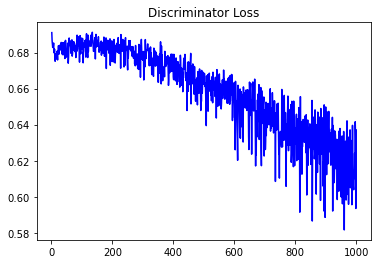

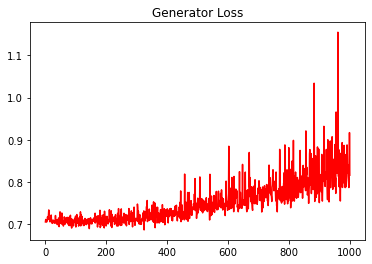

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4312588498070836


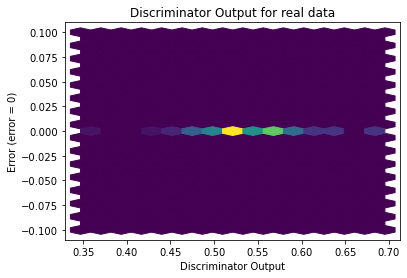

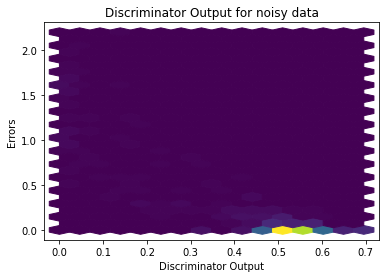

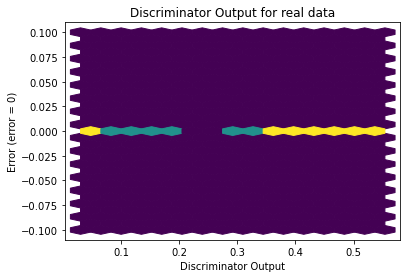

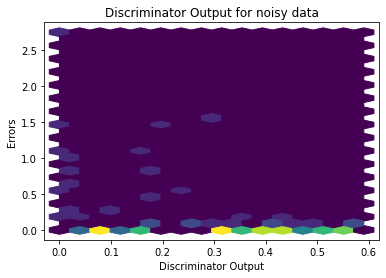

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


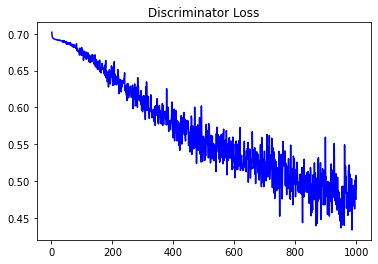

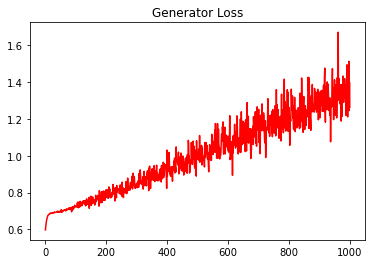

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.48304057443587045


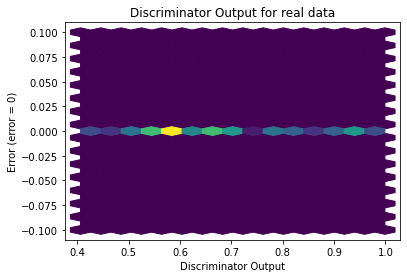

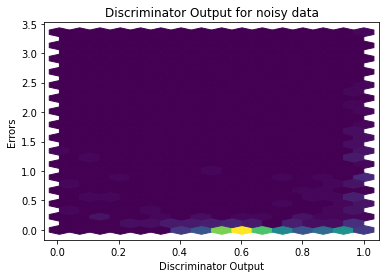

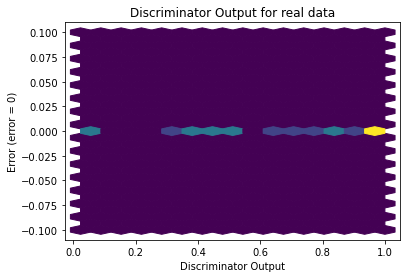

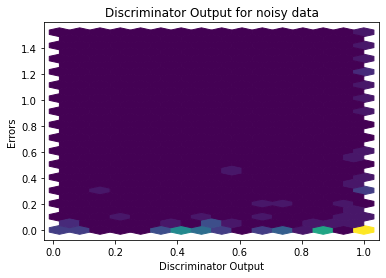

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
